# Testing of tomographic library

In [52]:
import skimage as sk
from lib import tomographic_data, Porosity
import numpy as np
import importlib
importlib.reload(tomographic_data)
importlib.reload(Porosity)
import matplotlib.pyplot  as plt
import os
import cv2 as cv
from tqdm import tqdm
import copy

### Smerdyna Sample

0.4395951315092182

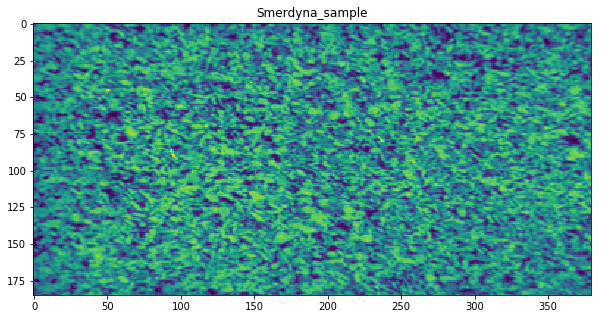

In [3]:
fname = 'Smerdyna0568.tif'
img = cv.imread(fname,cv.IMREAD_GRAYSCALE);
img_c = img.copy()
dims = np.shape(img_c);

x1 = 150; y1 = 120;  x2 = dims[0]-104; y2 = dims[1]-152
crop_size = [x1,y1,x2,y2];
crop_img = tomographic_data.crop_image(fname,crop_size)
data, porosity = tomographic_data.get_porosity(crop_img,380,185)
tomographic_data.makeF(data)

plt.figure(figsize=(10,8))
plt.imshow(data.T)
plt.title('Smerdyna_sample')
plt.imsave('Smerdyna.jpg',crop_img)
porosity
#np.shape(data)

### Variables names used for each samples are same. So Please clean all the output before running different case

### Wierbica Sample

Text(0.5, 1.0, 'Wierbica_Sample_bianry')

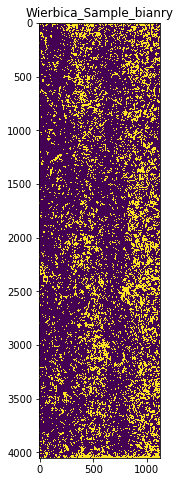

In [53]:
fname = 'Wierbica_binary.tif'
img = cv.imread(fname,cv.IMREAD_GRAYSCALE);
img_c = img.copy()
dims = np.shape(img_c);

x1 = 3; y1 = 4;  x2 = dims[0]-3; y2 = dims[1]-4
crop_size = [x1,y1,x2,y2];
crop_img = tomographic_data.crop_image(fname,crop_size)
data, porosity = tomographic_data.get_porosity(crop_img,405,112)
tomographic_data.makeF(1-data)

plt.figure(figsize=(10,8))
plt.imshow(crop_img)
plt.title('Wierbica_Sample_bianry')

### Create Porosity field with noise

In [25]:
dims = [400,200,1]
p = Porosity.create_porosity_roughness(dims,0.35,0.035)
data = 1-p;
tomographic_data.makeF(data)

### Cropping of slices

In [ ]:
size = [340,320,1670,1670]
list_file = os.listdir('SliceViews/')

for i in tqdm(range(269,4165)):
    filename = "SliceViews/" + str(i+1).zfill(5) + ".tif";
    savefilename = "Cropped_SliceViews/crop_" + str(i+1).zfill(5) + ".tif";
    #print(filename)
    crop_img = tomographic_data.crop_image(filename, size)
    cv.imwrite(savefilename,crop_img);